# Análisis de datos faltantes y valores atípicos

In [29]:
# Importar las librerias necesarias para hacer un EDA   
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Leer los datos
df_imss = pd.read_csv('../data/tidy_imss.csv')
df_agp = pd.read_csv('../data/tidy_agricultura_ganaderia_pesca.csv')

> Dado que estamos trabajando con dos tablas tidy, haremos un análisis primero para uno y después repetiremos el análisis para el segundo.

### 1. Análisis con el datraframe IMSS

#### 1.1 Datos faltantes

In [31]:
# Ver la información de los datos del IMSS
df_imss.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576259 entries, 0 to 1576258
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   rango_salarial              1572728 non-null  object
 1   asegurados                  1576259 non-null  int64 
 2   no_trabajadores             1576259 non-null  int64 
 3   año                         1576259 non-null  int64 
 4   mes                         1576259 non-null  int64 
 5   fecha                       1576259 non-null  object
 6   municipio                   1576259 non-null  object
 7   sector_economico_2          1576259 non-null  object
 8   sector_economico_4          1576259 non-null  object
 9   tamaño_patronal             1576259 non-null  object
 10  sexo                        1576259 non-null  object
 11  rango_edad                  1576259 non-null  object
 12  rango_salarial_descripcion  1576259 non-null  object
dtypes: int64(4),

In [32]:
# Contamos la cantidad de datos nulos por columna
df_imss.isnull().sum()

rango_salarial                3531
asegurados                       0
no_trabajadores                  0
año                              0
mes                              0
fecha                            0
municipio                        0
sector_economico_2               0
sector_economico_4               0
tamaño_patronal                  0
sexo                             0
rango_edad                       0
rango_salarial_descripcion       0
dtype: int64

In [33]:
# Investigamos qué valores puede tomar esta variable a través del catálogo de rango_salarial
catalogo_salarios = pd.read_csv('../data/imss_cat/imss_Rango_salario.csv')
catalogo_salarios

,Unnamed: 0,Rango salarial,Unnamed: 1
0,0,rango_salarial,descripción
1,1,W1,Hasta 1 vez el salario mínimo
2,2,W2,mayor a 1 y hasta 2 veces el salario mínimo
3,3,W3,mayor a 2 y hasta 3 veces el salario mínimo
4,4,W4,mayor a 3 y hasta 4 veces el salario mínimo
5,5,W5,mayor a 4 y hasta 5 veces el salario mínimo
6,6,W6,mayor a 5 y hasta 6 veces el salario mínimo
7,7,W7,mayor a 6 y hasta 7 veces el salario mínimo
8,8,W8,mayor a 7 y hasta 8 veces el salario mínimo
9,9,W9,mayor a 8 y hasta 9 veces el salario mínimo


In [34]:
# Notamos que los valores faltantes representan la categoría de "No aplica"
# Así que en lugar de eliminar los datos nulos, los rellenamos con "No aplica"
df_imss.rango_salarial.fillna("No aplica", inplace=True)
df_imss['rango_salarial'].value_counts()

rango_salarial
W2           571465
W3           299911
W4           188141
W5           127326
W6            87671
W7            64509
W8            48735
W9            34964
W10           26323
W11           19930
W12           15881
W13           12673
W14           11608
W25           10113
W16            9058
W15            8030
W18            5868
W17            5249
W1             4277
W21            3997
W19            3712
W20            3562
No aplica      3531
W24            3456
W23            3415
W22            2854
Name: count, dtype: int64

In [35]:
# Guardamos los cambios en un csv que contenga los datos tidy sin valores faltantes
df_imss.to_csv('../data/tidy_imss1.csv', index=False)

#### 1.2 Valores atípicos

In [36]:
# Ahora empezamos a buscar los datos atípicos
# Para esto, vemos una descripción de los datos
df_imss.describe()

,asegurados,no_trabajadores,año,mes
count,1.576259e+06,1576259.0,1.576259e+06,1.576259e+06
mean,6.228121e+00,0.0,2.015186e+03,6.491166e+00
std,1.761856e+01,0.0,4.880144e+00,3.447627e+00
min,1.000000e+00,0.0,2.006000e+03,1.000000e+00
25%,1.000000e+00,0.0,2.011000e+03,3.000000e+00
50%,2.000000e+00,0.0,2.016000e+03,6.000000e+00
75%,4.000000e+00,0.0,2.019000e+03,9.000000e+00
max,1.378000e+03,0.0,2.022000e+03,1.200000e+01


Observando las primeras dos columnas vemos que, en la columna de `asegurados` hay un valor que claramente es un outlier, pero por otra parte tenemos que la columna de `no_trabajadores` tiene un comportamiento atípico, dado que todos sus valores son ceros.


> Para este caso ignoraremos las columnas de año y mes. 

In [37]:
# Eliminamos la columna de no_trabajadores dado que no nos sirve para el análisis
df_imss.drop('no_trabajadores', axis=1, inplace=True)

<Axes: xlabel='asegurados', ylabel='sector_economico_4'>

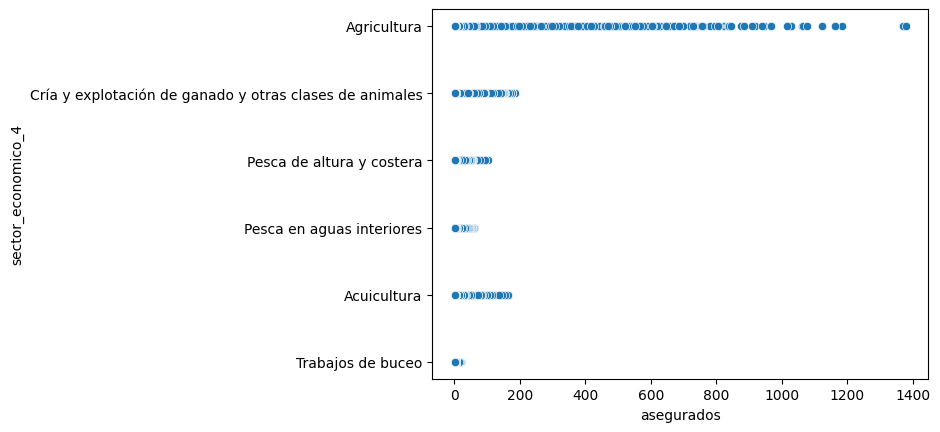

In [38]:
# Hacemos un scatterplot para ver la relación entre los asegurados y el sector económico
# Sabemos que el numero de asegurados depende del sector económico, pero queremos ver si
# hay algún sector que tenga una gran cantidad de asegurados o muy pocos
sns.scatterplot(x=df_imss.asegurados, y=df_imss.sector_economico_4)

Al ver esta gráfica pudieramos decir que no hay outliers, aunque pareciera lo contrario. Sabemos que hay zonas de agricultura que tienen una gran cantidad de trabajadores, pensar que hay zonas, o empresas, con casi 1400 trabajadores asegurados no debería extrañarnos. 

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# Creamos un dataframe con las columnas que nos interesan y las codificamos
df_outliers = df_imss[['asegurados', 'sector_economico_4']].copy()

# Creamos un encoder
le = LabelEncoder()

# Codificamos la columna de sector económico
df_outliers['sector_economico_4'] = le.fit_transform(df_outliers['sector_economico_4'])

# Convertimos el dataframe a un arreglo de numpy
X = df_outliers[['asegurados', 'sector_economico_4']].to_numpy()
X.shape

(1576259, 2)

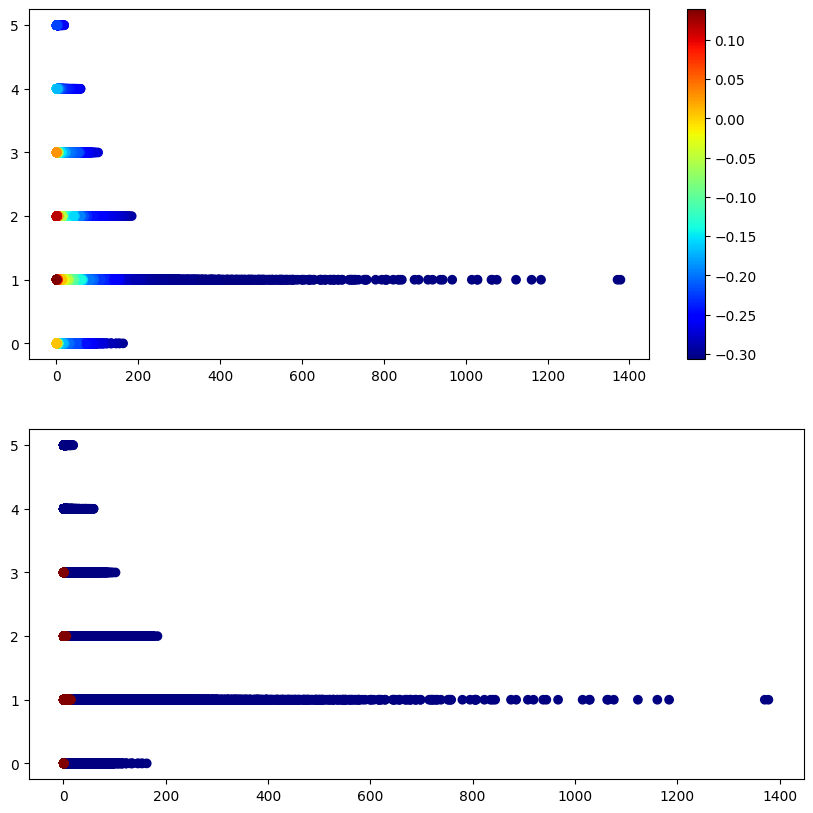

In [40]:
# Creamos el modelo de IsolationForest con el parámetro correcto 'n_estimators'
clf = IsolationForest(n_estimators=100)

# Entrenamos el modelo
clf.fit(X)

# Obtenemos el estimado de la función de decisión
estimado_IF = clf.decision_function(X)

plt.figure(figsize=(10, 10))

# Graficamos los datos
plt.subplot(2, 1, 1)
plt.scatter(x=X[:,0], y=X[:,1], c=estimado_IF, cmap='jet')
plt.colorbar() 

# Graficamos los datos nuevamente pero ahora con los datos atípicos resaltados
plt.subplot(2, 1, 2)
plt.scatter(x=X[:,0], y=X[:,1], c=np.where(estimado_IF > 0, 1, 0), cmap='jet')
plt.show()

Aquí podemos observar cómo el valor que es mayor entre los demás, para el grupo de Agricultura, no resultó ser un valor atípico, sin embargo, para este y otros grupos, los valores más pequeños resultan serlo.

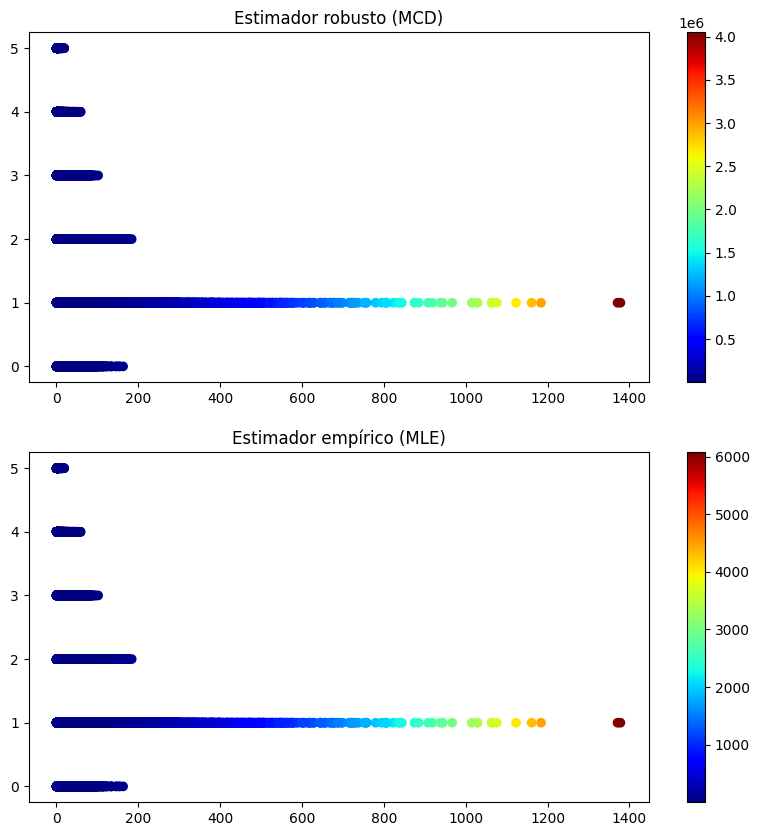

In [41]:
# Estimador robusto (MCD)
robust_cov = MinCovDet().fit(X)
estimado_MCD = robust_cov.mahalanobis(X)

# Estimador empírico (MLE)
emp_cov = EmpiricalCovariance().fit(X)
estimado_MLE = emp_cov.mahalanobis(X)

plt.figure(figsize=(10, 10))

# Graficamos los datos, primero con el estimador MCD
plt.subplot(2, 1, 1)
plt.scatter(x=X[:,0], y=X[:,1], c=estimado_MCD, cmap='jet')
plt.colorbar()
plt.title('Estimador robusto (MCD)')

# Graficamos los datos, ahora con el estimador MLE
plt.subplot(2, 1, 2)
plt.scatter(x=X[:,0], y=X[:,1], c=estimado_MLE, cmap='jet')
plt.colorbar()
plt.title('Estimador empírico (MLE)')

plt.show()

Con este modelo vemos que para ambos estimadores se han identificado los mismos outliers, valores atípicos en el sector agrícola. Sin embargo, comparando este modelo con el anterior (Isolation Forest), vemos que solo se identificaron outliers en este sector, cuando en el anterior había outliers en 4 sectores. 

### 2. Análisis con el datraframe AGP

#### 2.1 Datos faltantes

In [42]:
# Ver la información de los datos de la agricultura, ganadería y pesca
df_agp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27844 entries, 0 to 27843
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO              27844 non-null  object 
 1   SECTOR           27844 non-null  object 
 2   CVE_DDR          27844 non-null  int64  
 3   CVE_MUN          27844 non-null  int64  
 4   ESPECIE_CULTIVO  27844 non-null  object 
 5   TIPO             27844 non-null  object 
 6   PRODTON          27844 non-null  float64
 7   VALPROD          27844 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB


In [43]:
# Contamos la cantidad de datos nulos por columna
df_agp.isnull().sum()

ANO                0
SECTOR             0
CVE_DDR            0
CVE_MUN            0
ESPECIE_CULTIVO    0
TIPO               0
PRODTON            0
VALPROD            0
dtype: int64

En este caso, vemos que no hay datos faltantes, por lo que pasamos al paso siguiente.

#### 2.2 Valores atípicos

In [44]:
# Ahora empezamos a buscar los datos atípicos
# Para esto, vemos una descripción de los datos
df_agp.describe()

,CVE_DDR,CVE_MUN,PRODTON,VALPROD
count,27844.000000,27844.000000,2.784400e+04,2.784400e+04
mean,145.673502,35.241704,3.591274e+05,3.206009e+04
std,9.277004,19.008204,7.164407e+06,1.840531e+05
min,139.000000,1.000000,0.000000e+00,0.000000e+00
25%,142.000000,20.000000,3.802875e+01,1.448675e+02
50%,144.000000,31.000000,4.316735e+02,1.080000e+03
75%,148.000000,50.000000,3.160000e+03,7.440608e+03
max,193.000000,72.000000,4.058630e+08,5.018198e+06


Queriendo hacer una observación rápida, o descriptiva, de los datos, vemos que es complicado dado la naturaleza de los datos y el cómo varían por sectores. Por ello, agruparemos por sector y veremos una descripción de los datos nuevamente.

In [45]:
# Agrupamos por sector y seleccionamos las columnas que nos interesan
df_agp.groupby('SECTOR')[['PRODTON','VALPROD']].describe()

PRODTON                                                       \
               count          mean           std  min        25%      50%   
SECTOR                                                                      
Agricultura  19296.0  4.855778e+03  2.061334e+04  0.0   53.90000    405.0   
Ganadería     5082.0  2.029551e+03  8.156678e+03  0.0    6.03075    160.0   
Pesca         3466.0  2.855029e+06  2.013286e+07  0.0  567.00000  21000.0   

                                         VALPROD                               \
                      75%           max    count          mean            std   
SECTOR                                                                          
Agricultura    2511.25000  5.854322e+05  19296.0  26206.145192  154177.410763   
Ganadería       786.43425  9.558728e+04   5082.0  55107.555395  249284.477141   
Pesca        200000.00000  4.058630e+08   3466.0  30857.108348  218501.359436   

                                                                
             min       25%       50%          75%          max  
SECTOR                                                          
Agricultura  0.0  169.2375  1075.905   6347.78500  5018197.910  
Ganadería    0.0  225.0000  2392.855  24393.75000  3750770.000  
Pesca        0.0    7.0800   378.000   3667.19825  4483132.541

A pesar de que se puede visualizar mejor, sigue siendo difícil observar los datos atípicos, por lo que vamos a hacer uso de métodos gráficos que nos ayuden a encontrarlos.

> Las columnas de `CVE_DDR` y `CVE_MUN` fueron ignoradas dado que son claves que ayudan a identificar regiones geográficas.

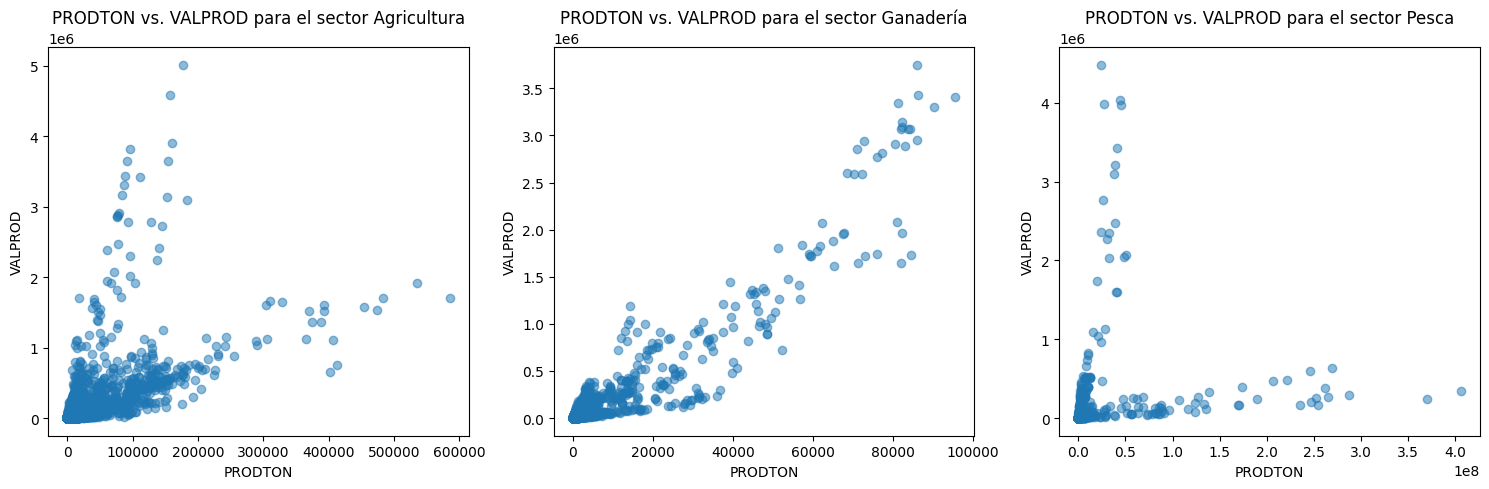

In [46]:
# Hacemos una lista de los sectores
sectores = df_agp['SECTOR'].unique()

# Definir las dimensiones de la figura y los subplots
fig, axs = plt.subplots(1, len(sectores), figsize=(15, 5))

for i, sector in enumerate(sectores):
    data_sector = df_agp[df_agp['SECTOR'] == sector]
    axs[i].scatter(data_sector['PRODTON'], data_sector['VALPROD'], alpha=0.5)
    axs[i].set_title(f'PRODTON vs. VALPROD para el sector {sector}')
    axs[i].set_xlabel('PRODTON')
    axs[i].set_ylabel('VALPROD')

# Ajustar el espacio entre los subplots para evitar superposiciones de etiquetas
plt.tight_layout()

# Mostrar la figura en pantalla
plt.show()

En estas gráficas es difícil poder visualizar los outliers que se encuentran en los datos. Para poder identificarlos, haremos uso de los métodos que se aplicaron anteriormente.

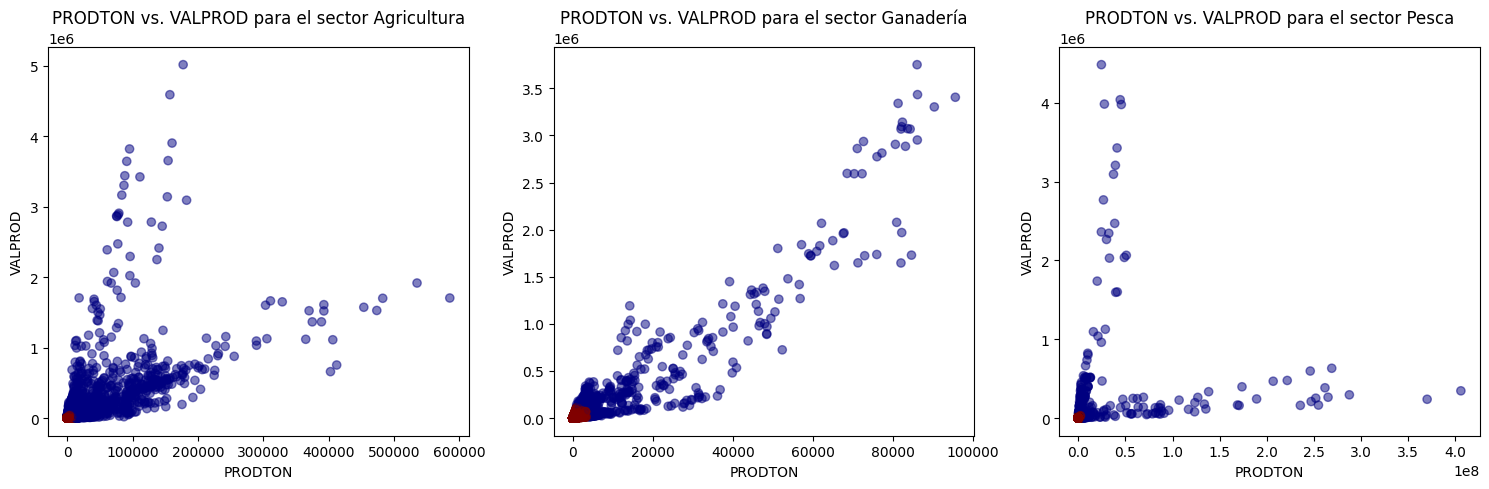

In [47]:
# Definir las dimensiones de la figura y los subplots
fig, axs = plt.subplots(1, len(sectores), figsize=(15, 5))

# Creamos un modelo de IsolationForest
clf = IsolationForest(n_estimators=100)

for i, sector in enumerate(sectores):
    # Obtenemos los datos del sector
    data_sector = df_agp[df_agp['SECTOR'] == sector][['PRODTON', 'VALPROD']].to_numpy()
    # Entrenamos el modelo
    clf.fit(data_sector)
    # Obtenemos el estimado de la función de decisión
    estimado_IF = clf.decision_function(data_sector)
    # Graficamos los datos en el subplot correspondiente
    axs[i].scatter(data_sector[:, 0], data_sector[:, 1], c=np.where(estimado_IF > 0, 1, 0), cmap='jet', alpha=0.5)
    axs[i].set_title(f'PRODTON vs. VALPROD para el sector {sector}')
    axs[i].set_xlabel('PRODTON')
    axs[i].set_ylabel('VALPROD')

# Ajustar el espacio entre los subplots para evitar superposiciones de etiquetas
plt.tight_layout()

# Mostrar
plt.show()

Aquí podemos observar los outliers que el modelo identificó. En este caso, para los 3 sectores, los outliers identificados fueron valores muy bajos, con certeza no podemos decir si son valores iguales a 0 por la magnitud de los valores, sin embargo, es un aspecto a tratar con los especialistas y poder decir con certeza si esos valores bajos son anomalías o no.

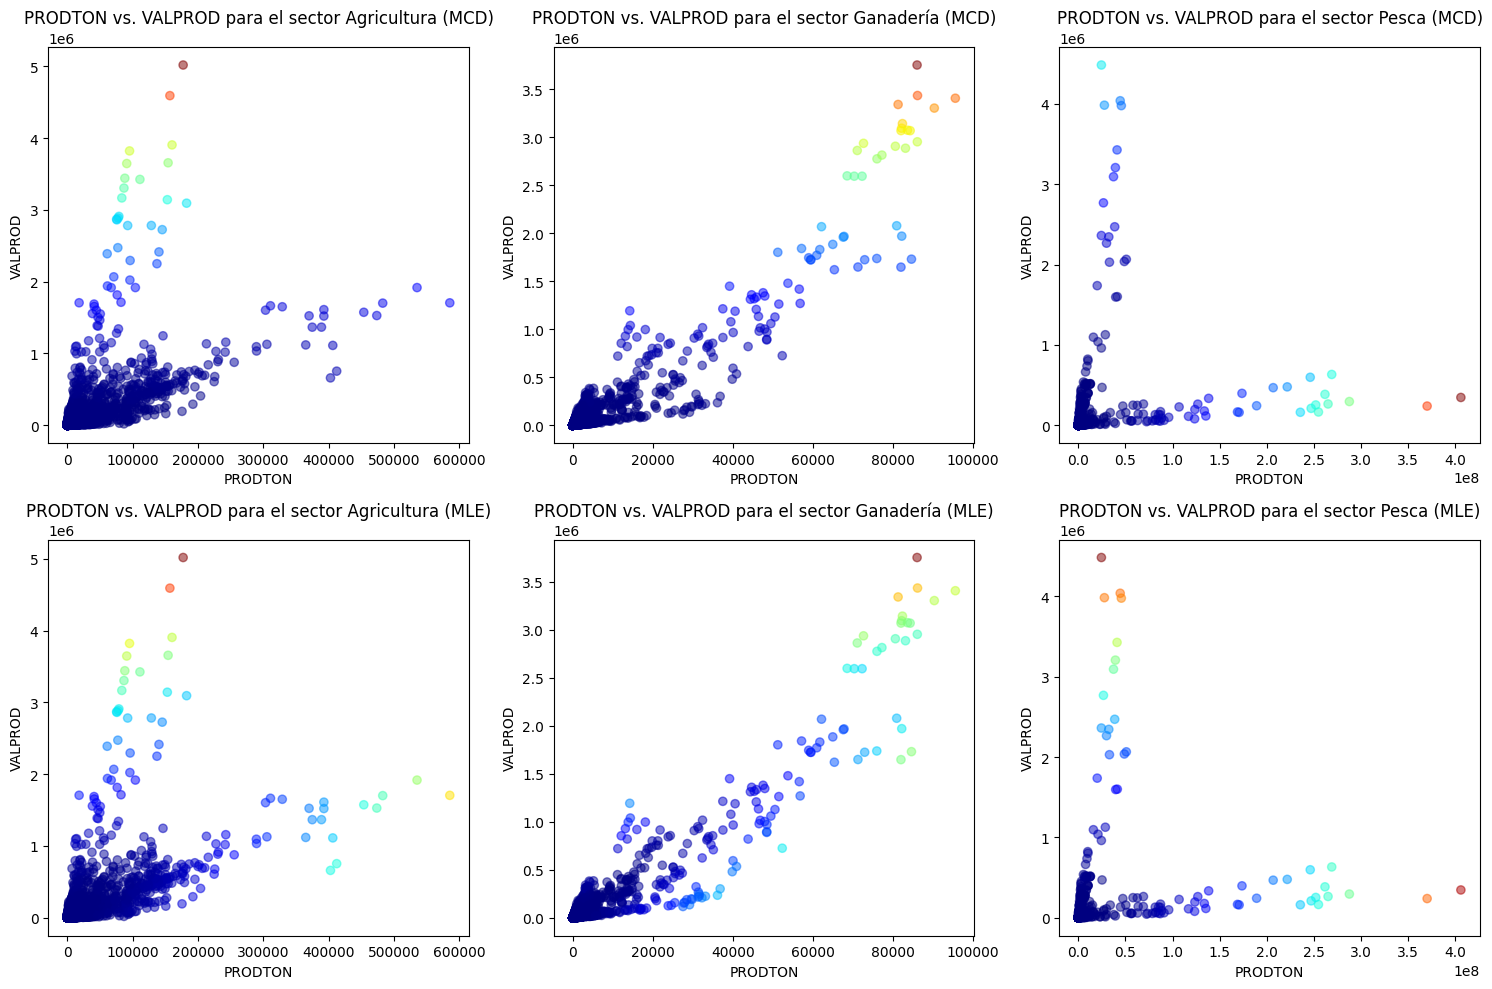

In [48]:
# Definir las dimensiones de la figura y los subplots
fig, axs = plt.subplots(2, len(sectores), figsize=(15, 10))

for i, sector in enumerate(sectores):
    # Obtenemos los datos del sector
    data_sector = df_agp[df_agp['SECTOR'] == sector][['PRODTON', 'VALPROD']].to_numpy()
    # Estimador robusto (MCD)
    robust_cov = MinCovDet().fit(data_sector)
    estimado_MCD = robust_cov.mahalanobis(data_sector)

    # Estimador empírico (MLE)
    emp_cov = EmpiricalCovariance().fit(data_sector)
    estimado_MLE = emp_cov.mahalanobis(data_sector)
    
    # Graficar los datos con el estimador MCD en el primer subplot
    axs[0, i].scatter(data_sector[:, 0], data_sector[:, 1], \
                      c=estimado_MCD, cmap='jet', alpha=0.5)
    axs[0, i].set_title(f'PRODTON vs. VALPROD para el sector {sector} (MCD)')
    axs[0, i].set_xlabel('PRODTON')
    axs[0, i].set_ylabel('VALPROD')

    # Graficar los datos con el estimador MLE en el segundo subplot
    axs[1, i].scatter(data_sector[:, 0], data_sector[:, 1], \
                      c=estimado_MLE, cmap='jet', alpha=0.5)
    axs[1, i].set_title(f'PRODTON vs. VALPROD para el sector {sector} (MLE)')
    axs[1, i].set_xlabel('PRODTON')
    axs[1, i].set_ylabel('VALPROD')

# Ajustar el espacio entre los subplots para evitar superposiciones de etiquetas
plt.tight_layout()

# Mostrar
plt.show()


En este otro caso, tenemos que los valores más grandes son identificados por el modelo como anomalías. Nuevamente no podemos decir con certeza si lo son o no; así como en el caso anterior, debemos mostrarle a los expertos cómo estos modelos han identificado los outliers y así, poder tratarlos correctamente.